In [1]:
%cd ../..
%reload_ext autoreload
%autoreload 2

/mnt/d/ownCloud/Uni/Semester Ma 5/Advanced Deep Learning for Robotics (IN2349)/Project/tum-adlr-ws20-9


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from statistics import mean

from alpha_one.data.replay import ReplayDataManager
from alpha_one.model.model_manager import AlphaOneCheckpointManager

Instructions for updating:
non-resource variables are not supported in the long term


In [27]:
game_name = 'leduc_poker'
run_name = 'LP-local-39'

In [28]:
model_manager = AlphaOneCheckpointManager(game_name, run_name)
observation_data_manager = model_manager.observation_model_manager.get_replay_data_manager()

In [29]:
observation_buffer = observation_data_manager.load_replays(-1)

In [30]:
grouped_samples = defaultdict(list)
for sample in observation_buffer.data[-10000:]:
    grouped_samples[str(sample.observation)].append(sample)

In [31]:
entropies = []
for samples in grouped_samples.values():
    target_policy = np.zeros(len(samples[0].legals_mask))
    for sample in samples:
        target_policy += sample.policy
    target_policy /= len(samples)
    
    target_policy = target_policy[np.where(target_policy > 0)]
    entropies.append(np.sum(- target_policy * np.log(target_policy)))

In [32]:
mean(entropies)

1.0239442834255126

In [33]:
state_ambiguities = [len({str(sample.policy[sample.legals_mask]) for sample in samples}) for samples in grouped_samples.values()]

In [34]:
histogram = defaultdict(lambda: 0)
for state_ambiguity in state_ambiguities:
    histogram[state_ambiguity] += 1

Text(0, 0.5, 'Frequency')

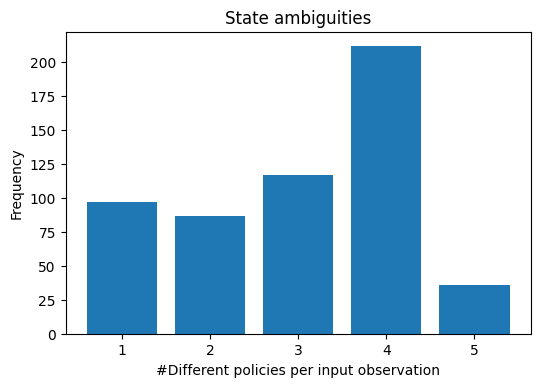

In [43]:
plt.figure(figsize=(6, 4), dpi=100)
plt.title("State ambiguities")
plt.bar(histogram.keys(), histogram.values())
plt.xlabel("#Different policies per input observation")
plt.ylabel("Frequency")

In [36]:
late_game_groups = [samples for samples in grouped_samples.values() if samples[0].observation[-2] >= 5]

In [37]:
[idx for idx, group in enumerate(late_game_groups) if len(group) > 40]

[32, 37, 89]

<BarContainer object of 5 artists>

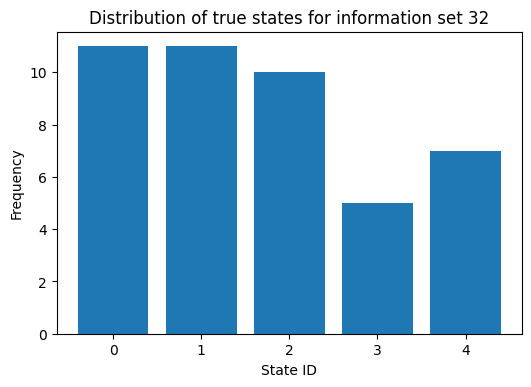

In [45]:
group_id = 32

true_states = [np.where(sample.policy[sample.legals_mask] == 1)[0][0] for sample in late_game_groups[group_id]]
true_states_histogram = defaultdict(lambda: 0)
for true_state in true_states:
    true_states_histogram[true_state] += 1
 
plt.figure(figsize=(6, 4), dpi=100)
plt.title(f"Distribution of true states for information set {group_id}")
plt.xlabel(f"State ID")
plt.ylabel(f"Frequency")
plt.bar(true_states_histogram.keys(), true_states_histogram.values())

In [ ]:
print(late_game_groups[group_id][0].observation[-32:-16])